# Vector Spaces

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
# Define two 2D vectors using NumPy
import numpy as np

# vector1 = np.array([1, 4])
# vector2 = np.array([5, 4])

vector1 = np.array([0, 1])
vector2 = np.array([1, 1])

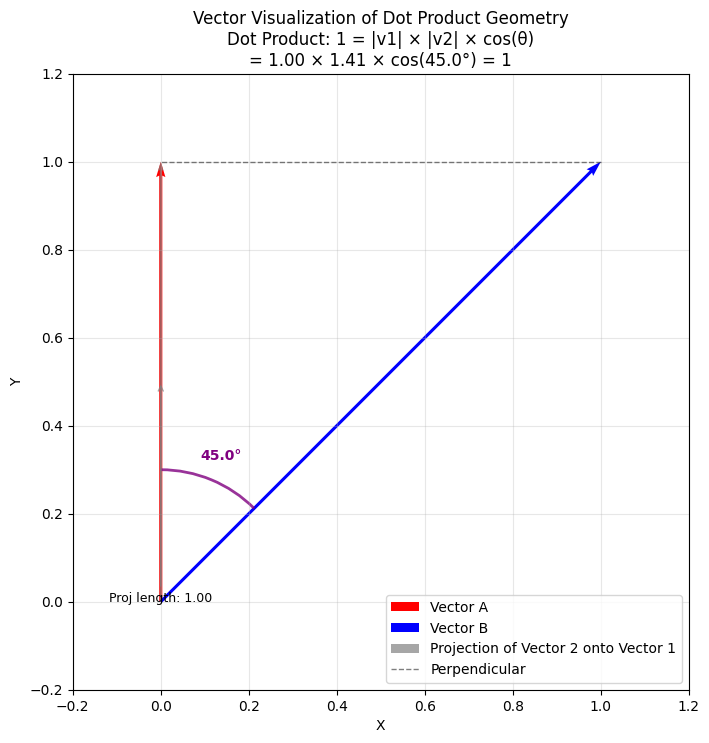

In [5]:
from python_physics.vectors import plot_vectors_with_projection

# Visualize with projection and angle
plot_vectors_with_projection(vector1, vector2, labels=['Vector A', 'Vector B'], show_projection=True)